In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/training.csv')
df.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,101812,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,85509,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,NaN,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,212641,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,102702,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,185737,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,14,0,0


In [3]:
df['label'].value_counts()

label
0    8656497
1      32029
Name: count, dtype: int64

# locdt loctm
Normalize loctm, for example 120000 => 0.5

In [4]:
df['normalized_loctm'] = df['loctm'] // 10000 * 3600 + (df['loctm'] % 10000)//100 * 60 + df['loctm'] % 100
df['normalized_loctm']=(df['normalized_loctm']-df['normalized_loctm'].min())/(df['normalized_loctm'].max()-df['normalized_loctm'].min()+1)

In [5]:
df[df['loctm']==120000]['normalized_loctm']

55492      0.5
100144     0.5
135444     0.5
154958     0.5
172662     0.5
          ... 
8467822    0.5
8490413    0.5
8518417    0.5
8549609    0.5
8655431    0.5
Name: normalized_loctm, Length: 169, dtype: float64

In [6]:
normalized_loctm = df['normalized_loctm']
df.drop(['loctm', 'normalized_loctm'], axis=1, inplace=True)
df.insert(1, 'loctm', normalized_loctm)
df.head()

,txkey,loctm,locdt,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,0.429306,46,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,0.371632,17,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,NaN,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,0.893530,44,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,0.435440,42,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,0.790012,31,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,14,0,0


# Original

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold


print('No Frauds', round(df['label'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['label'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('label', axis=1)
y = df['label']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]



# See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

No Frauds 99.63 % of the dataset
Frauds 0.37 % of the dataset
Train: [1722669 1722851 1722891 ... 8688523 8688524 8688525] Test: [      0       1       2 ... 1737758 1737759 1737760]
Train: [      0       1       2 ... 8688523 8688524 8688525] Test: [1722669 1722851 1722891 ... 3475467 3475468 3475469]
Train: [      0       1       2 ... 8688523 8688524 8688525] Test: [3461625 3461631 3461936 ... 5213249 5213250 5213251]
Train: [      0       1       2 ... 8688523 8688524 8688525] Test: [5175924 5176029 5176360 ... 6950945 6950946 6950947]
Train: [      0       1       2 ... 6950945 6950946 6950947] Test: [6919499 6919679 6919898 ... 8688523 8688524 8688525]


In [8]:
from sklearn.utils import resample

original_data = pd.concat([original_Xtrain,  original_ytrain], axis=1)
min_class_size = len(original_data[original_data['label']==1])

maj_class = original_data[original_data['label']==0]
min_class = original_data[original_data['label']==1]

min_samples = int(1000000 * (min_class_size/len(original_data)))
maj_samples = 1000000 - min_samples

maj = resample(maj_class, replace=False, n_samples=maj_samples, random_state=42)
min = resample(min_class, replace=False, n_samples=min_samples, random_state=42)

stratified = pd.concat([maj, min])
original_Xtrain = stratified.drop('label', axis=1)
original_ytrain = stratified['label']


# Transform object values

In [9]:
cats = ['txkey', 'chid', 'cano', 'mchno', 'acqic']

ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_data = ord_encoder.fit_transform(original_Xtrain[cats])

original_Xtrain[cats] = encoded_data

In [10]:
original_Xtrain.dtypes

txkey        float64
loctm        float64
locdt          int64
chid         float64
cano         float64
contp          int64
etymd        float64
mchno        float64
acqic        float64
mcc          float64
conam        float64
ecfg           int64
insfg          int64
iterm        float64
bnsfg          int64
flam1          int64
stocn        float64
scity        float64
stscd        float64
ovrlt          int64
flbmk          int64
hcefg        float64
csmcu        float64
csmam          int64
flg_3dsmk      int64
dtype: object

# Fill nan values

In [11]:
na = ['etymd', 'mcc', 'stocn', 'scity', 'stscd', 'hcefg', 'csmcu']

simple_imputer = SimpleImputer(strategy="most_frequent")
imputed_data = simple_imputer.fit_transform(original_Xtrain[na])

original_Xtrain[na] = imputed_data

In [12]:
original_Xtrain.isna().sum()

txkey        0
loctm        0
locdt        0
chid         0
cano         0
contp        0
etymd        0
mchno        0
acqic        0
mcc          0
conam        0
ecfg         0
insfg        0
iterm        0
bnsfg        0
flam1        0
stocn        0
scity        0
stscd        0
ovrlt        0
flbmk        0
hcefg        0
csmcu        0
csmam        0
flg_3dsmk    0
dtype: int64

# Feature selection
### numeric features: 
locdt, loctm, conam, iterm, flam1, csmam

## First see the relationship between 3 money-related features

## Summary
* conma and flam1 are highly correlated so we choose one

In [13]:
original_Xtrain[['conam', 'flam1', 'csmam']].corr()

,conam,flam1,csmam
conam,1.000000,0.999919,0.093605
flam1,0.999919,1.000000,0.093638
csmam,0.093605,0.093638,1.000000


In [14]:
num_attribs = ['locdt', 'loctm', 'conam', 'iterm', 'csmam']

### categorical features
chid, cano, contp, etymd, mchno, acqic, mcc, ecfg, insfg, bnsfg, stocn, scity, stscd, ovrlt, flbmk, hcefg, csmcu, flg_3dsmk

## See if stocn and scity are correlated
### Summary
* p-value < 0.05
* 

In [15]:
from sklearn.feature_selection import chi2

chi2(original_Xtrain['stocn'].values.reshape(-1, 1), original_Xtrain['scity'])

(array([83241429.8041404]), array([0.]))

In [16]:
# country_city = pd.crosstab(original_Xtrain['stocn'], original_Xtrain['scity'])

# sns.heatmap(country_city, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
# plt.xlabel('City')
# plt.ylabel('Country')
# plt.title('City Distribution by Country')
# plt.show()

In [17]:
from sklearn.feature_selection import SelectKBest


cat_attribs = ['chid', 'cano', 'contp', 'etymd', 'mchno', 'acqic', 'mcc', 'ecfg', 'insfg', 'bnsfg', 'scity', 'stscd', 
               'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'flg_3dsmk']
cat_original_Xtrain = original_Xtrain[cat_attribs]
selector = SelectKBest(chi2, k=len(cat_attribs)//2)
selector.fit(cat_original_Xtrain, original_ytrain)

SelectKBest(k=8, score_func=<function chi2 at 0x0000022EB2F94310>)

In [18]:
cols_idxs = selector.get_support(indices=True)
new_cat_original_Xtrain = cat_original_Xtrain.iloc[:,cols_idxs]

In [19]:
selected_original_Xtrain = pd.concat([new_cat_original_Xtrain, original_Xtrain[num_attribs]], axis=1)
selected_columns = selected_original_Xtrain.columns
selected_columns

Index(['chid', 'cano', 'mchno', 'acqic', 'mcc', 'ecfg', 'scity', 'csmcu',
       'locdt', 'loctm', 'conam', 'iterm', 'csmam'],
      dtype='object')

# Smote

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from joblib import Parallel, delayed
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_

selected_original_Xtrain = selected_original_Xtrain.values
selected_original_Xtest = original_Xtest[selected_columns].values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values



Length of X (train): 1000000 | Length of y (train): 1000000
Length of X (test): 1737705 | Length of y (test): 1737705


In [23]:
# knears_neighbors_sm = KNeighborsClassifier(n_jobs=-1)
# knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# rand_knears_neighbors = RandomizedSearchCV(KNeighborsClassifier(), knears_params, n_iter=6)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg_params = {"penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}

# rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1), log_reg_params, n_iter=3, n_jobs=-1)
log_reg = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)

robust_scaler = RobustScaler()


for index, (train, test) in enumerate(sss.split(selected_original_Xtrain, original_ytrain)):
    print(index)
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy=0.5, k_neighbors=3), log_reg) # SMOTE happens during Cross Validation not before..
    X_train = robust_scaler.fit_transform(selected_original_Xtrain[train])
    model = pipeline.fit(X_train, original_ytrain[train])
    prediction = log_reg.predict(selected_original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(selected_original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

 

0


d:\ML\mlenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1


d:\ML\mlenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


2


d:\ML\mlenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


3


d:\ML\mlenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


4


d:\ML\mlenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
from joblib import dump, load
dump(log_reg, 'log_reg_v1.joblib') 

['log_reg_v1.joblib']

In [26]:
print(f'accuracy {np.mean(accuracy_lst)}')
print(f'precision {np.mean(precision_lst)}')
print(f'recall {np.mean(recall_lst)}')
print(f'f1 {np.mean(f1_lst)}')
print(f'auc {np.mean(auc_lst)}')

accuracy 0.6968219999999999
precision 0.005365277850797405
recall 0.43572896787312515
f1 0.01059219321942815
auc 0.5667585555703889


In [29]:
precision_lst

[0.005256979533506865,
 0.005367065888931074,
 0.005146618791143028,
 0.005003335557038025,
 0.006052389483368034]

# Undersample

## random undersampling
keep all 32029 fraud data and randomly pick 32029 non fraud data

In [ ]:
undersample_df = df.sample(frac=1)

In [ ]:
fraud_undersample_df = undersample_df.loc[undersample_df['label']==1]
non_fraud_undersample_df = undersample_df.loc[undersample_df['label']==0][:32029]

new_undersample_df = pd.concat([fraud_undersample_df, non_fraud_undersample_df]).sample(frac=1, random_state=42)
new_undersample_df.head()

,txkey,loctm,locdt,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
6251358,5991262.0,0.344572,26,227157.0,201500.0,5,5.0,124124.0,1806.0,273.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,85,0,0
1071303,7075275.0,0.987072,50,186467.0,383618.0,5,8.0,142454.0,6103.0,309.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,461,0,0
7756692,3962118.0,0.353819,46,460268.0,341668.0,5,1.0,99301.0,5030.0,493.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,0,0,0
4230588,7456302.0,0.682292,8,234427.0,592255.0,5,1.0,120043.0,7671.0,318.0,...,54.0,11170.0,1.0,0,0,6.0,70.0,0,0,1
4749231,1035693.0,0.507639,14,372569.0,362397.0,5,8.0,125563.0,1806.0,276.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,277,0,0


In [ ]:
new_undersample_df['label'].value_counts()

label
0    32029
1    32029
Name: count, dtype: int64

## correlation comparison
### summary ###
ecfg and stocn strong positive correlated, scity strong negative correlated, but the correlation from stocn, scity does not mean much

Text(0.5, 1.0, 'Imbalanced correlation matrix')

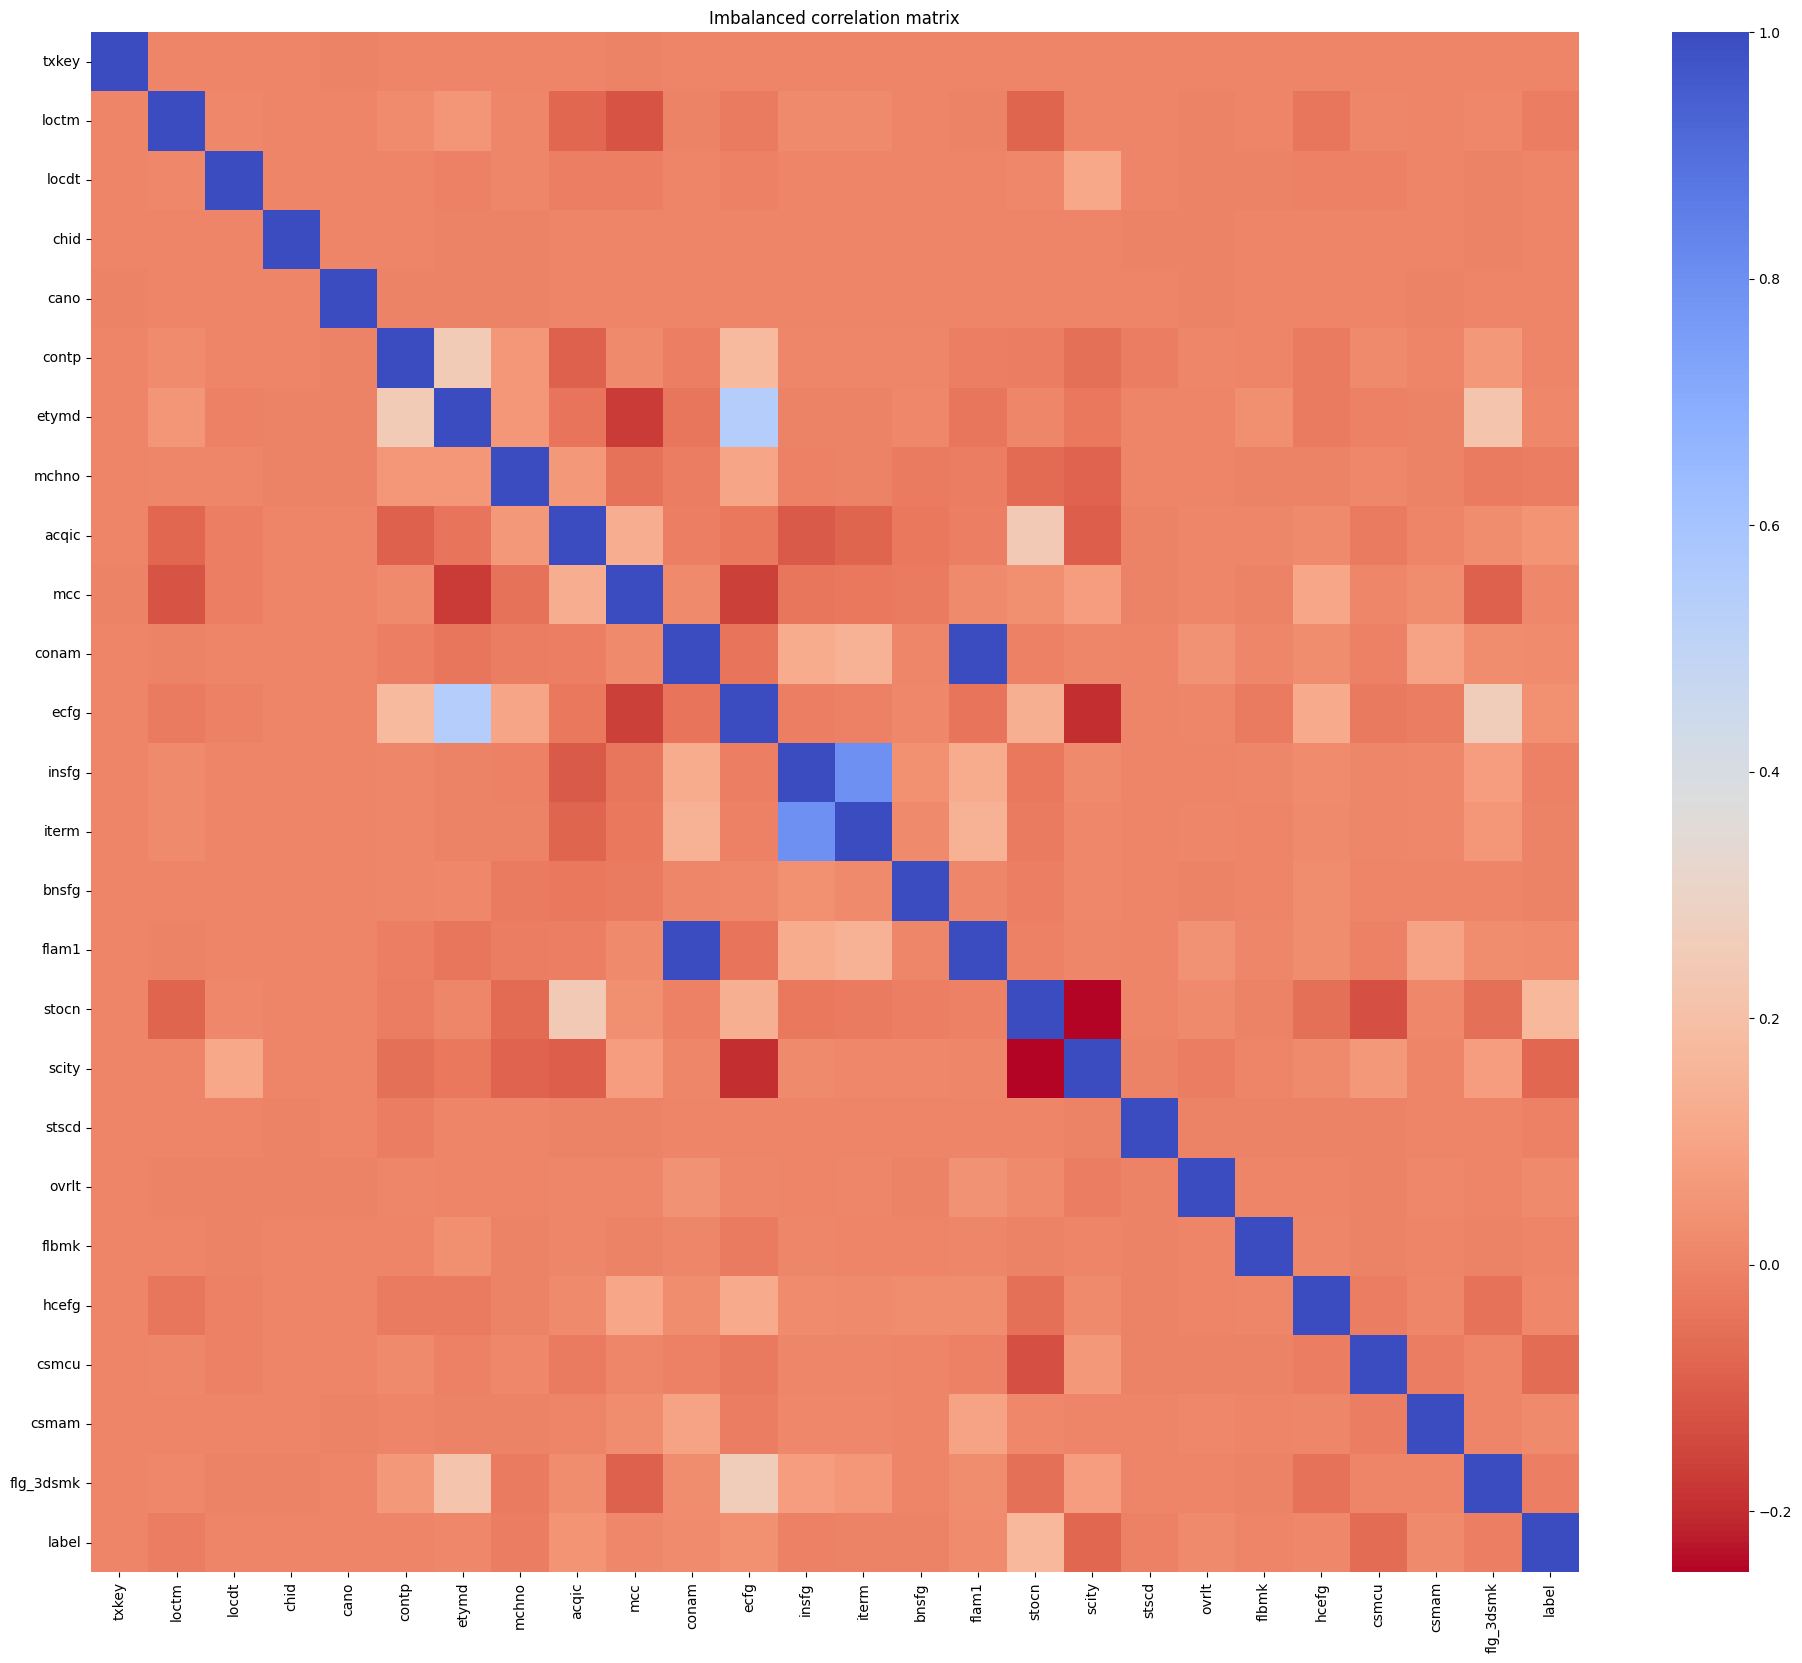

In [ ]:
plt.figure(figsize=(24, 20))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Imbalanced correlation matrix')

Text(0.5, 1.0, 'Imbalanced correlation matrix')

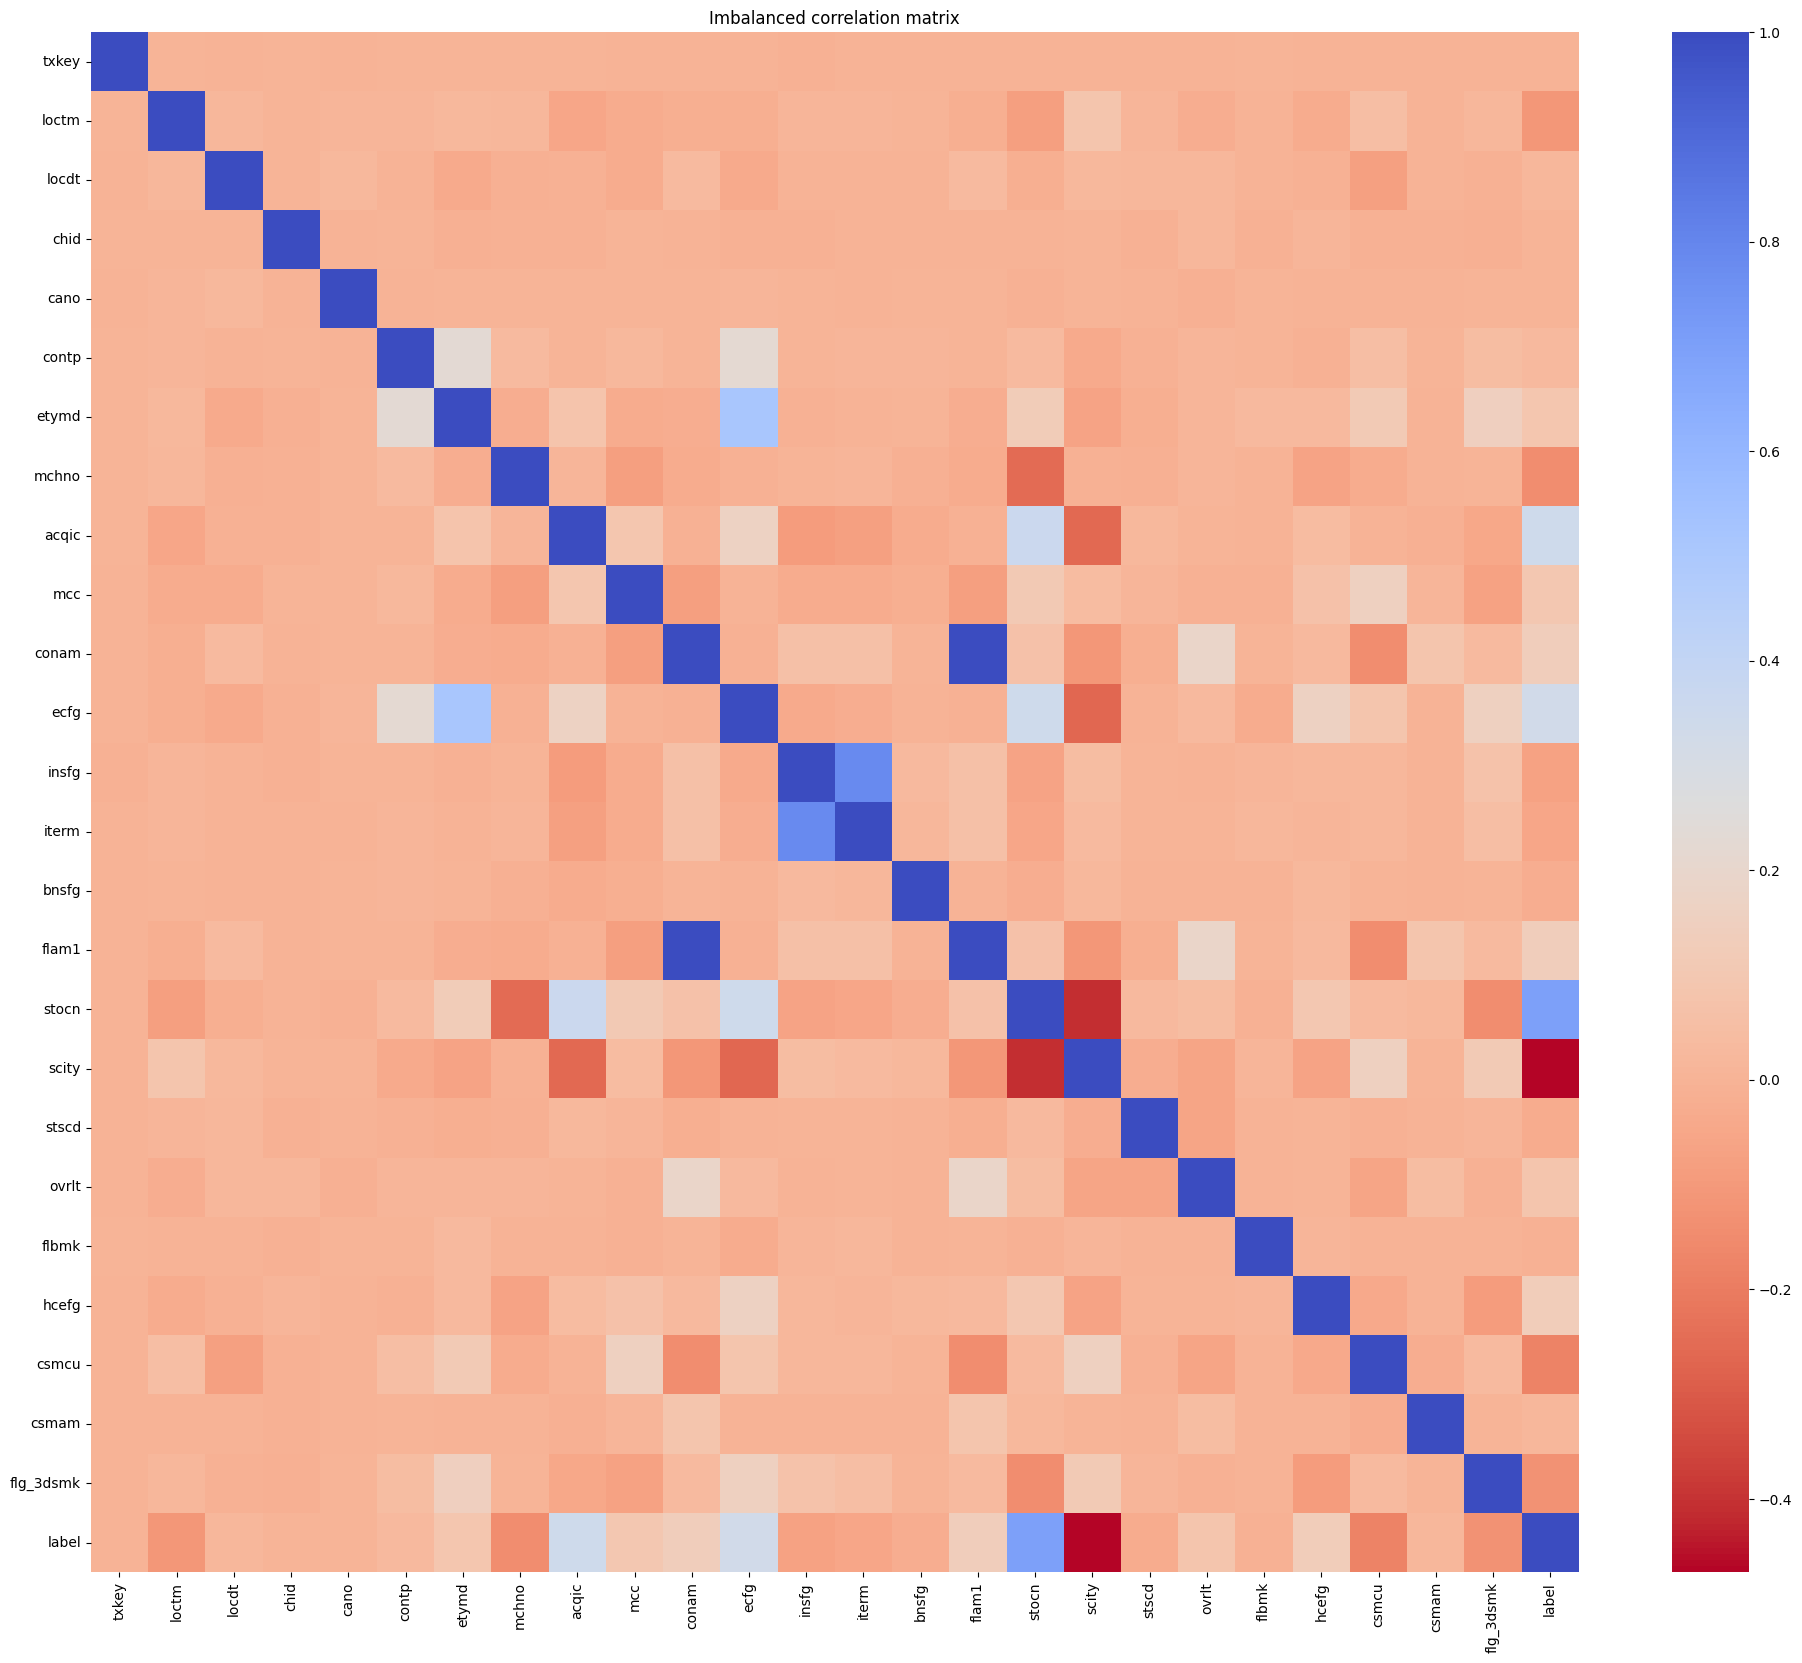

In [ ]:
plt.figure(figsize=(24, 20))
corr = new_undersample_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Imbalanced correlation matrix')

In [ ]:
corr['label'].sort_values(ascending=False)

label        1.000000
stocn        0.701178
acqic        0.345321
ecfg         0.332603
flam1        0.138650
conam        0.138583
hcefg        0.127603
mcc          0.094511
etymd        0.091699
ovrlt        0.086211
contp        0.028007
csmam        0.017249
locdt        0.013446
cano         0.004809
chid         0.003046
txkey       -0.001543
flbmk       -0.007416
bnsfg       -0.025026
stscd       -0.028776
iterm       -0.052644
insfg       -0.071228
loctm       -0.109698
flg_3dsmk   -0.130875
mchno       -0.147713
csmcu       -0.179371
scity       -0.469967
Name: label, dtype: float64

# Clustering
compare t-SNE, PCA, and Truncated SCD

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [ ]:
X = new_undersample_df.drop('label', axis=1)
y = new_undersample_df['label']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

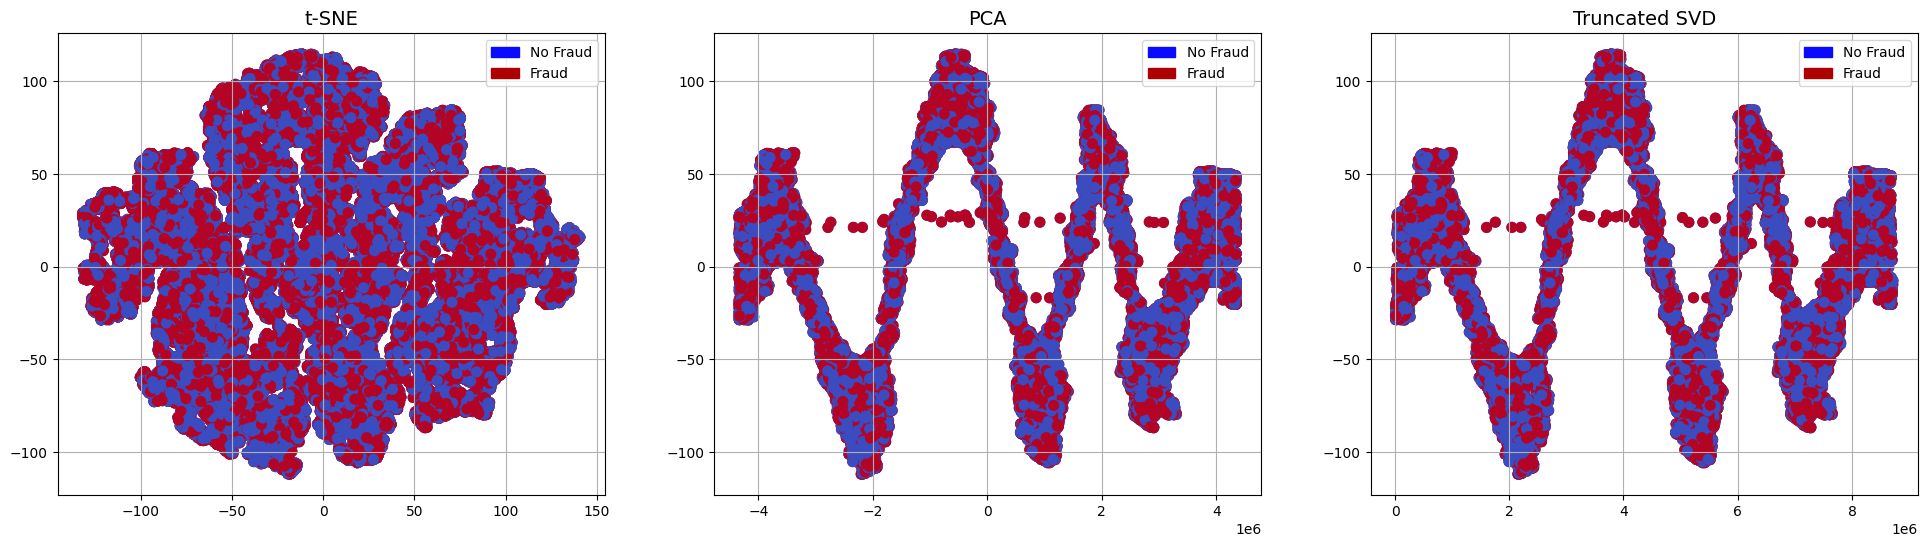

In [ ]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidth=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap='coolwarm', label='Fraud', linewidth=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

ax2.scatter(X_reduced_pca[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidth=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap='coolwarm', label='Fraud', linewidth=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

ax3.scatter(X_reduced_svd[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidth=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap='coolwarm', label='Fraud', linewidth=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
                                  

# Training

In [ ]:
X = new_undersample_df.drop('label', axis=1)
y = new_undersample_df['label']

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train.values)

In [ ]:
X_test =  X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifiers = {
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5)
        print(f'Classifiers: {key} has a training score of {round(training_score.mean(), 2)*100} % accuracy score')

Classifiers: KNearest has a training score of 92.0 % accuracy score
Classifiers: DecisionTreeClassifier has a training score of 92.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV

# KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# DecisionTree
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [ ]:
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 91.83%
DecisionTree Classifier Cross Validation Score 91.45%


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Decision Tree Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/home/jovyan/NLP/nlp/lib/python3.10/site-packages/matplotlib/pyplot.py'>

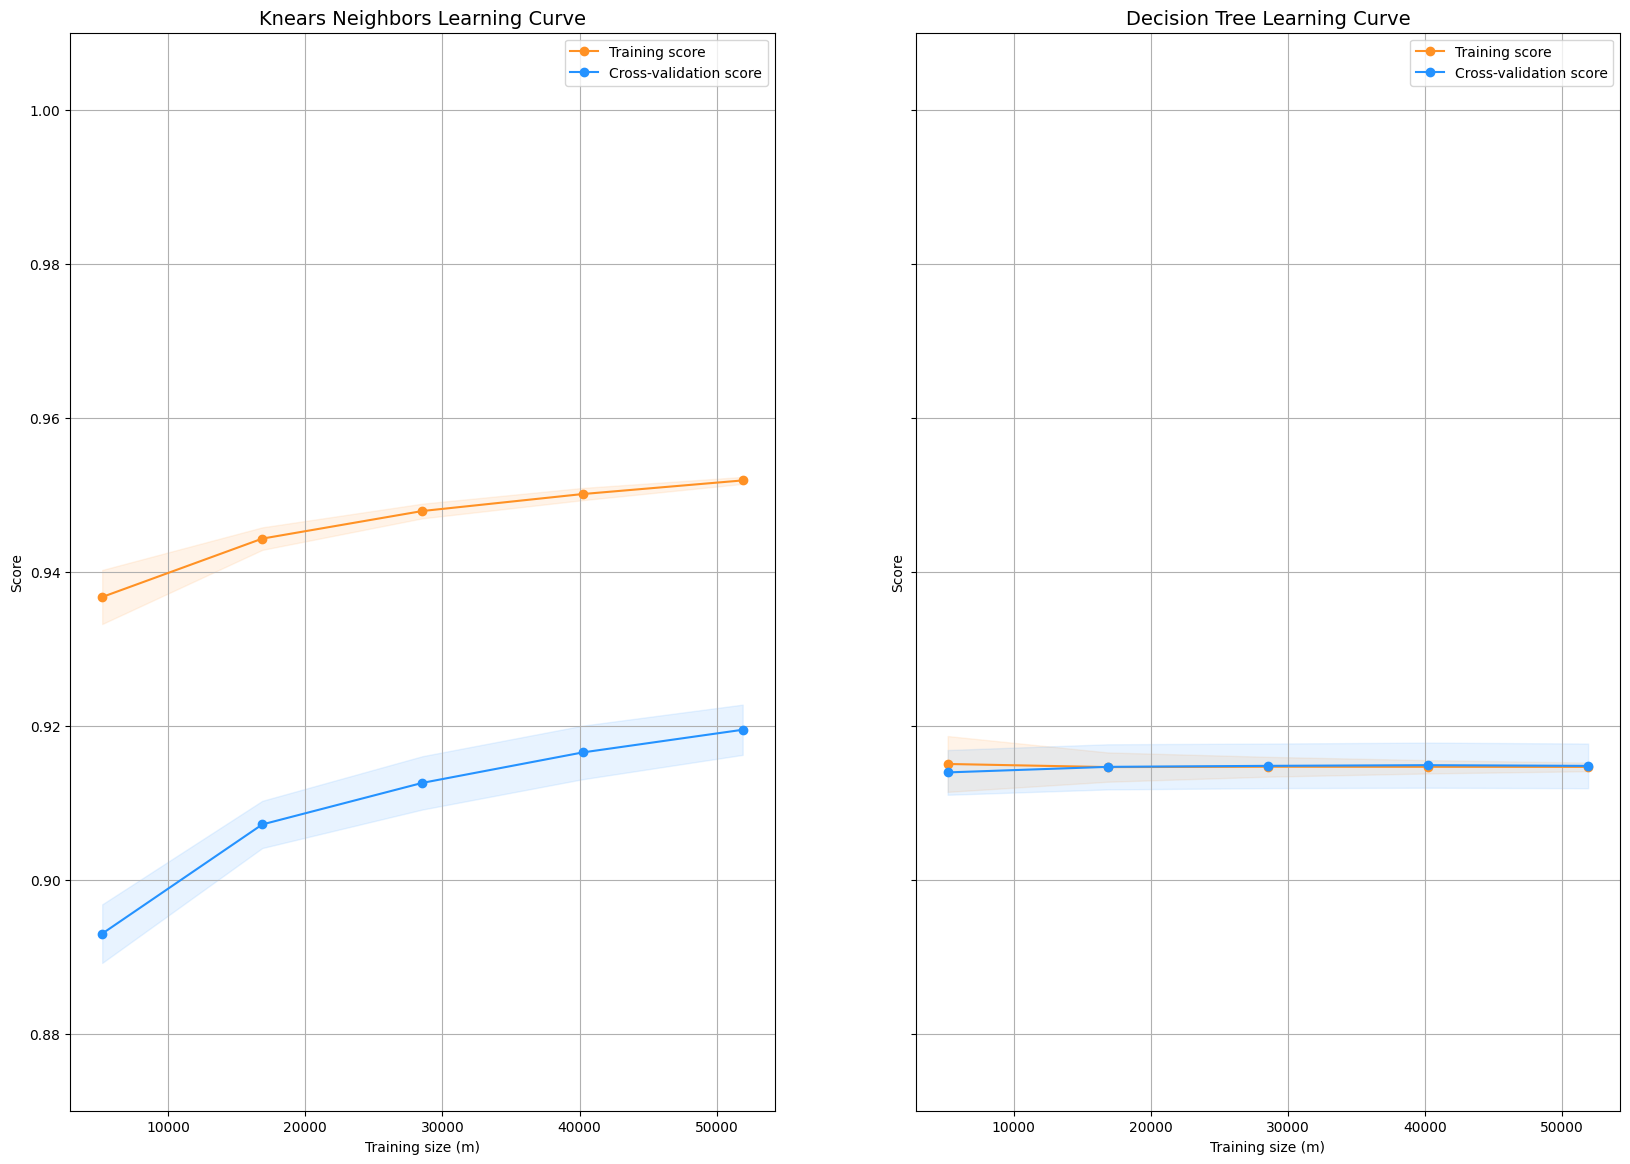

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=42)
plot_learning_curve(knears_neighbors, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=2)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
# Create a DataFrame with all the scores and the classifiers names.


knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

KNears Neighbors:  0.9182747685630744
Decision Tree Classifier:  0.9145244191683466


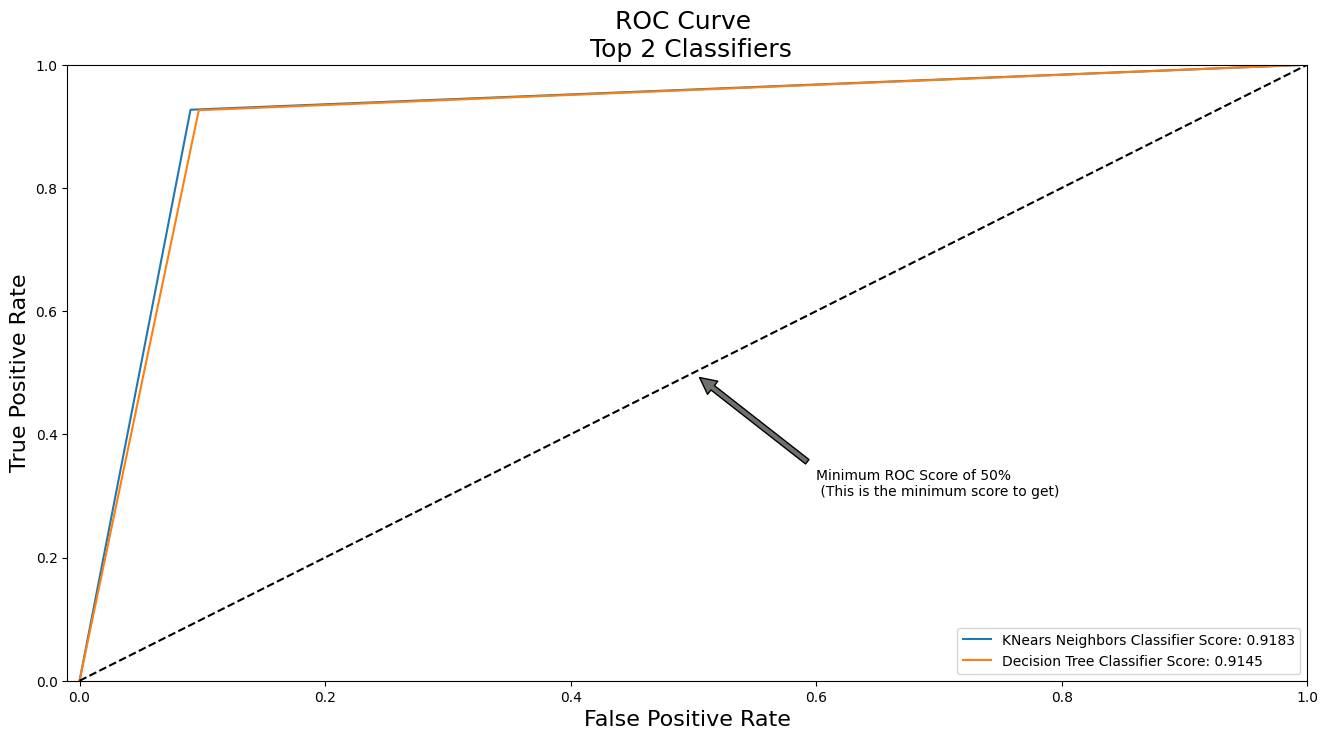

In [ ]:
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(knear_fpr, knear_tpr,tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

# KNN

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

undersample_X = new_undersample_df.drop('label', axis=1)
undersample_y = new_undersample_df['label']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print('Train:', train_index, 'Test:', test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
robust_scaler = RobustScaler()
undersample_Xtrain = robust_scaler.fit_transform(undersample_Xtrain.values)

undersample_Xtest = undersample_Xtest .values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), knears_neighbors) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [12788 12798 12800 ... 64055 64056 64057] Test: [    0     1     2 ... 12821 12824 12830]
Train: [    0     1     2 ... 64055 64056 64057] Test: [12788 12798 12800 ... 25640 25642 25645]
Train: [    0     1     2 ... 64055 64056 64057] Test: [25603 25604 25605 ... 38661 38664 38673]
Train: [    0     1     2 ... 64055 64056 64057] Test: [38214 38215 38218 ... 51391 51392 51393]
Train: [    0     1     2 ... 51391 51392 51393] Test: [51073 51074 51075 ... 64055 64056 64057]
NearMiss Label Distribution: Counter({0: 32029, 1: 32029})


In [ ]:
from sklearn.metrics import precision_recall_curve

knears_precision, knears_recall, knears_threshold = precision_recall_curve(y_train, knears_pred)

In [ ]:

y_pred = knears_neighbors.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.93
F1 Score: 0.94
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.57
Precision Score: 0.00
Recall Score: 0.46
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
undersample_y_score = knears_neighbors.predict_proba(original_Xtest).argmax(axis=1)

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.00


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.00')

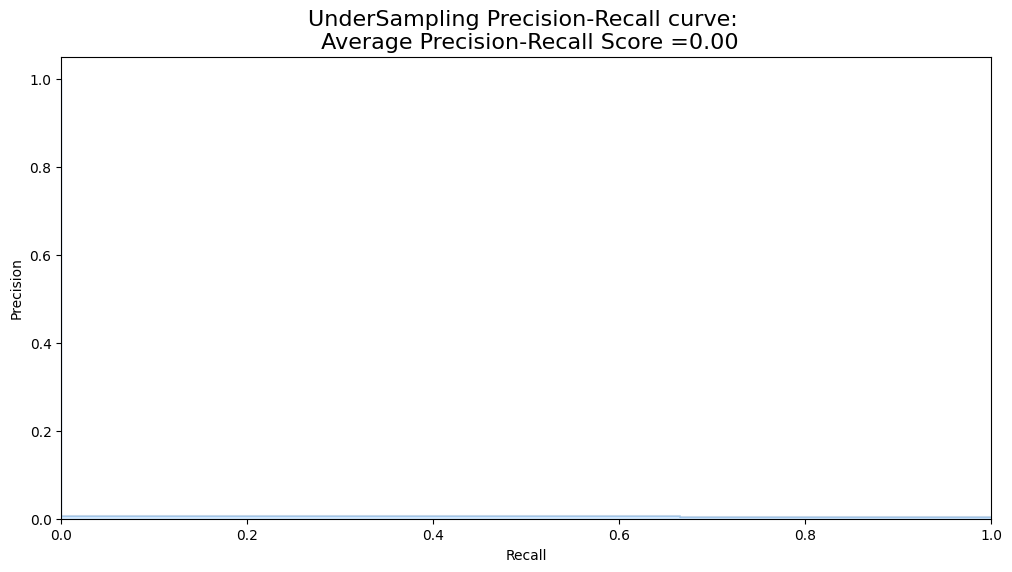

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

# Smote

## Oversample during cross-validating 

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from joblib import Parallel, delayed

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

knears_neighbors_sm = KNeighborsClassifier(n_jobs=-1)
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

rand_knears_neighbors = RandomizedSearchCV(KNeighborsClassifier(), knears_params, n_iter=6)

robust_scaler = RobustScaler()


for index, (train, test) in enumerate(sss.split(original_Xtrain, original_ytrain)):
    print(index)
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy=0.5, k_neighbors=3), rand_knears_neighbors) # SMOTE happens during Cross Validation not before..
    X_train = robust_scaler.fit_transform(original_Xtrain[train])
    model = pipeline.fit(X_train, original_ytrain[train])
    best_est = rand_knears_neighbors.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))



NameError: name 'original_Xtrain' is not defined

In [ ]:
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [ ]:
y_score = best_est.predict_proba(original_X_test).argmax(axis=1)

In [ ]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision)

In [ ]:
fig = plt.figure(figsize=(12, 6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post'0
plt.fill_between(recall, precision, step='post', alpha-0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
knears_neighbors_sm..best_estimator_, best_est

In [ ]:
from joblib import dump, load
dump(rand_knears_neighbors, 'filename.joblib') 